# Module 4 Spatial Clustering

In [1]:
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
districts = geopandas.read_file('data/berlin-districts.geojson')

In [3]:
districts.head()

,district,district_group,median_price,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,"MULTIPOLYGON (((1493006.880 6912074.798, 14929..."
1,Helmholtzplatz,Pankow,58.0,"MULTIPOLYGON (((1493245.549 6900059.696, 14932..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"MULTIPOLYGON (((1481381.452 6885170.698, 14813..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,"MULTIPOLYGON (((1526159.829 6872101.044, 15261..."
4,Müggelheim,Treptow - Köpenick,25.0,"MULTIPOLYGON (((1529265.086 6874326.842, 15292..."


## Medium Price Distribution

/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


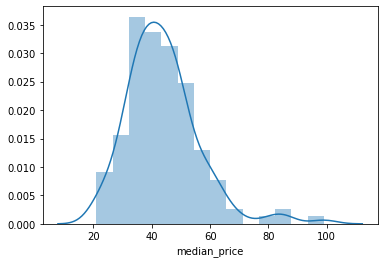

In [4]:
import seaborn as sns
sns.distplot(districts['median_price'])

## Spatial Distribution of Medium Price

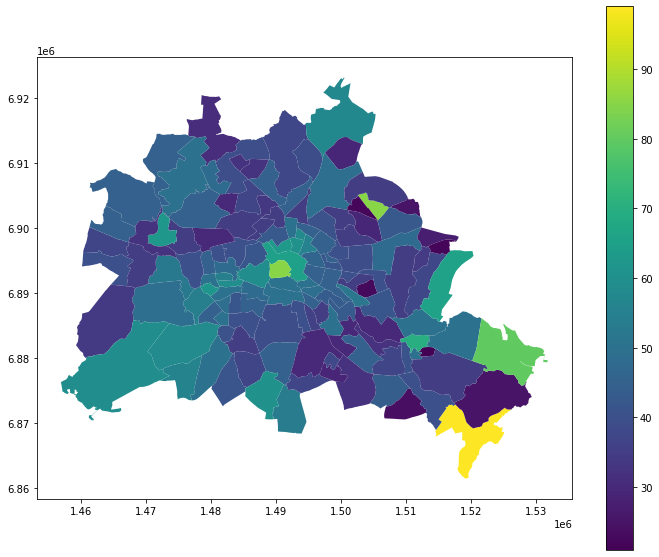

In [6]:
districts.plot(column='median_price', 
        figsize = (12, 10), 
        legend=True)

## Global Clustering

In [7]:
median_median_price = districts['median_price'].median()
mapper = lambda price: "1 High"  if price > median_median_price else "0 Low"
districts['price_label'] = districts['median_price'].map(mapper)
districts.head()

,district,district_group,median_price,geometry,price_label
0,Blankenfelde/Niederschönhausen,Pankow,37.5,"MULTIPOLYGON (((1493006.880 6912074.798, 14929...",0 Low
1,Helmholtzplatz,Pankow,58.0,"MULTIPOLYGON (((1493245.549 6900059.696, 14932...",1 High
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"MULTIPOLYGON (((1481381.452 6885170.698, 14813...",1 High
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,"MULTIPOLYGON (((1526159.829 6872101.044, 15261...",1 High
4,Müggelheim,Treptow - Köpenick,25.0,"MULTIPOLYGON (((1529265.086 6874326.842, 15292...",0 Low


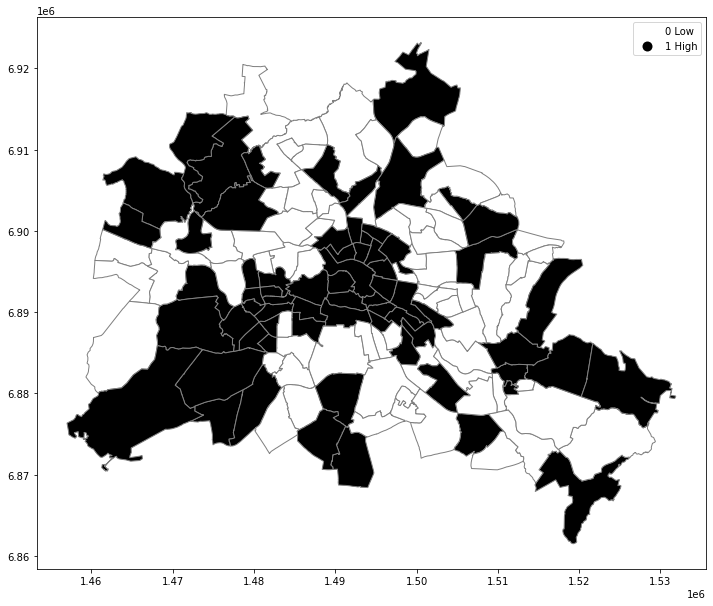

In [14]:
districts.plot(column='price_label', 
               figsize = (12, 12), 
               legend=True, 
               cmap='binary',
               edgecolor='grey')

## Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(districts[['median_price']])

AgglomerativeClustering(n_clusters=3)

In [10]:
cluster.labels_

array([2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2])

In [18]:
districts['price_cluster'] = cluster.labels_.astype(str)

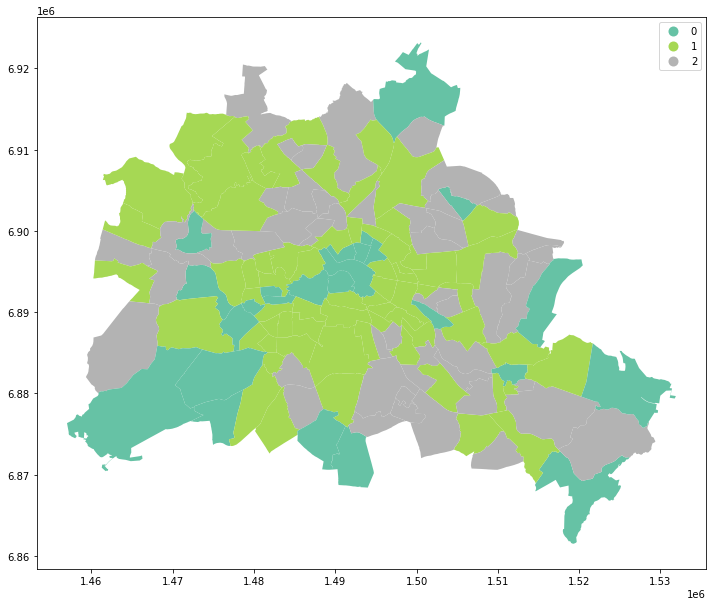

In [28]:
districts.plot(column='price_cluster', 
       figsize = (12, 12), 
       cmap='Set2', 
       legend = True)

## Case Study

In [29]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import numpy as np

In [30]:
listings = pd.read_csv('./data/berlin-listings.csv.gz')
listings.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,17260587,https://www.airbnb.com/rooms/17260587,20170507222235,2017-05-08,Kunterbuntes Zimmer mit eigenem Bad für jedermann,"Meine Unterkunft ist gut für paare, alleinreis...",NaN,"Meine Unterkunft ist gut für paare, alleinreis...",none,...,10.0,f,NaN,NaN,t,flexible,f,f,3,2.00
1,1,17227881,https://www.airbnb.com/rooms/17227881,20170507222235,2017-05-08,Modernes Zimmer in Berlin Pankow,Es ist ein schönes gepflegtes und modernes Zim...,Das Haus befindet sich direkt vor eine Tram Ha...,Es ist ein schönes gepflegtes und modernes Zim...,none,...,10.0,f,NaN,NaN,t,flexible,f,f,1,1.29
2,2,1153584,https://www.airbnb.com/rooms/1153584,20170507222235,2017-05-08,Gästezimmer Berlin-Pankow,Unser Gästezimmer befindet sich im Dachgeschos...,"Wenn Ihr eine anspruchsvolles Ambiente sucht, ...",Unser Gästezimmer befindet sich im Dachgeschos...,none,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.27
3,3,7832750,https://www.airbnb.com/rooms/7832750,20170507222235,2017-05-08,Sonniges Doppelzimmer+Nice Price!,Welcome! Hier vermiete ich ein kleines Wohlfüh...,Die Wohnung ist durch Ihre Lage sehr schön hel...,Welcome! Hier vermiete ich ein kleines Wohlfüh...,none,...,10.0,f,NaN,NaN,t,flexible,f,f,1,5.43
4,4,11634962,https://www.airbnb.com/rooms/11634962,20170507222235,2017-05-08,Room for womens in Pankow 30 min from the city,Gemütliches Zimmer im ruhigen Teil von Berlin....,"Es handelt sich um ein großes, gemütliches Zim...",Gemütliches Zimmer im ruhigen Teil von Berlin....,none,...,9.0,f,NaN,NaN,f,flexible,f,f,1,1.45


In [31]:
# listings.info()

In [32]:
listings[['longitude','latitude']].head()

,longitude,latitude
0,13.396092,52.583306
1,13.398582,52.576417
2,13.399261,52.589218
3,13.395584,52.582312
4,13.393662,52.583749


In [33]:
listings['geometry'] = listings[['longitude','latitude']].apply(Point, axis=1)
listings[['longitude','latitude','geometry']].head()

,longitude,latitude,geometry
0,13.396092,52.583306,POINT (13.39609155582258 52.58330601280297)
1,13.398582,52.576417,POINT (13.39858179168584 52.57641672545431)
2,13.399261,52.589218,POINT (13.39926058607291 52.58921822417372)
3,13.395584,52.582312,POINT (13.39558437349547 52.58231232676322)
4,13.393662,52.583749,POINT (13.39366220747834 52.58374867055552)


In [34]:
type(listings)

pandas.core.frame.DataFrame

In [35]:
listings = gpd.GeoDataFrame(listings)
type(listings)

geopandas.geodataframe.GeoDataFrame

In [36]:
listings.crs

In [37]:
listings.crs = {'init':'epsg:4269'}
listings.crs

/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Geographic 2D CRS: +init=epsg:4269 +type=crs>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
listings = listings.to_crs(epsg=3857)
listings.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

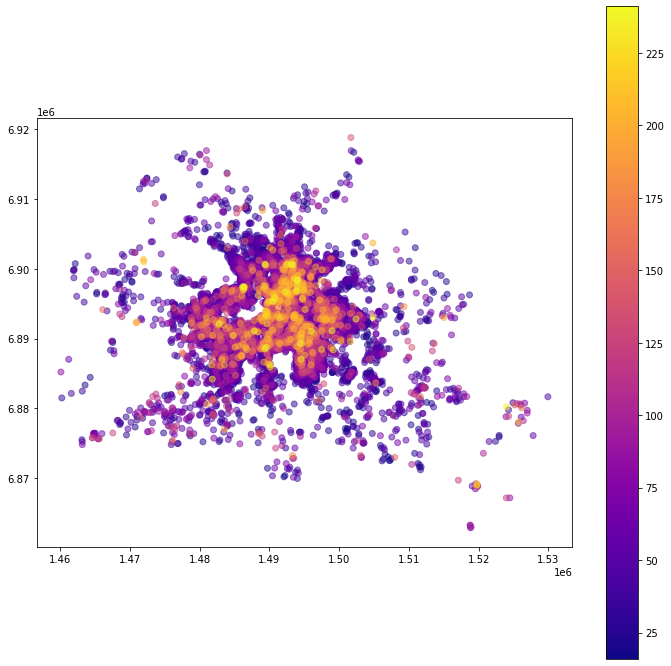

In [40]:
listings.sort_values('price').plot(column = 'price', 
                                   figsize = (12, 12), 
                                   cmap='plasma', 
                                   alpha = 0.5, 
                                   legend = True)

In [58]:
coordinates = listings['geometry'].apply(lambda p: [p.x, p.y]).values
coordinates

array([list([1491246.0906142415, 6906289.705883671]),
       list([1491523.3024024945, 6905027.621432627]),
       list([1491598.8654480171, 6907372.952865081]), ...,
       list([1483626.5916714866, 6909789.475658347]),
       list([1484643.0570827546, 6911169.655477716]),
       list([1524454.5494963308, 6867174.512409843])], dtype=object)

In [59]:
coordinates = np.vstack(coordinates)
coordinates

array([[1491246.09061424, 6906289.70588367],
       [1491523.30240249, 6905027.62143263],
       [1491598.86544802, 6907372.95286508],
       ...,
       [1483626.59167149, 6909789.47565835],
       [1484643.05708275, 6911169.65547772],
       [1524454.54949633, 6867174.51240984]])

In [61]:
cluster = AgglomerativeClustering(n_clusters=10)
cluster.fit(coordinates)

AgglomerativeClustering(n_clusters=10)

In [64]:
listings['price_cluster'] = cluster.labels_.astype(str)
listings['price_cluster']

0        2
1        2
2        2
3        2
4        2
        ..
20048    1
20049    1
20050    1
20051    1
20052    5
Name: price_cluster, Length: 20053, dtype: object

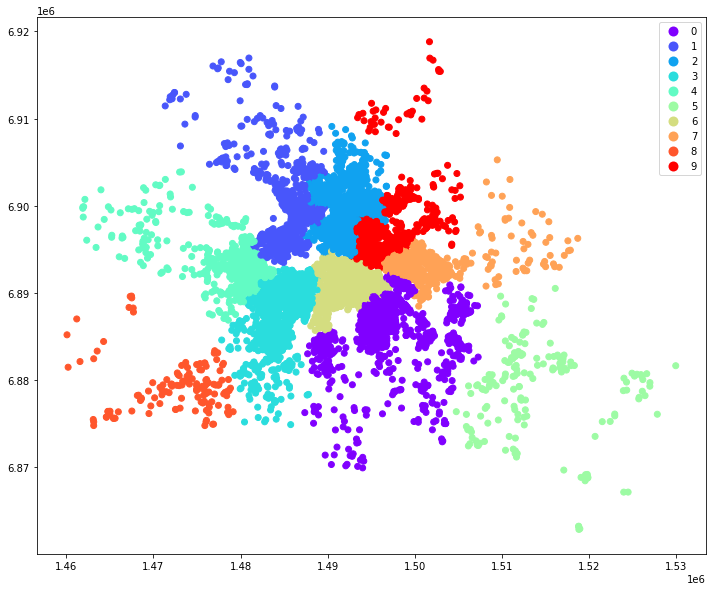

In [65]:
listings.plot(column='price_cluster', 
       figsize = (12, 12), 
       cmap='rainbow', 
       legend = True)